In [94]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from scipy import linalg as la
import random
import sys

### Plot Entire Timeline Histogram

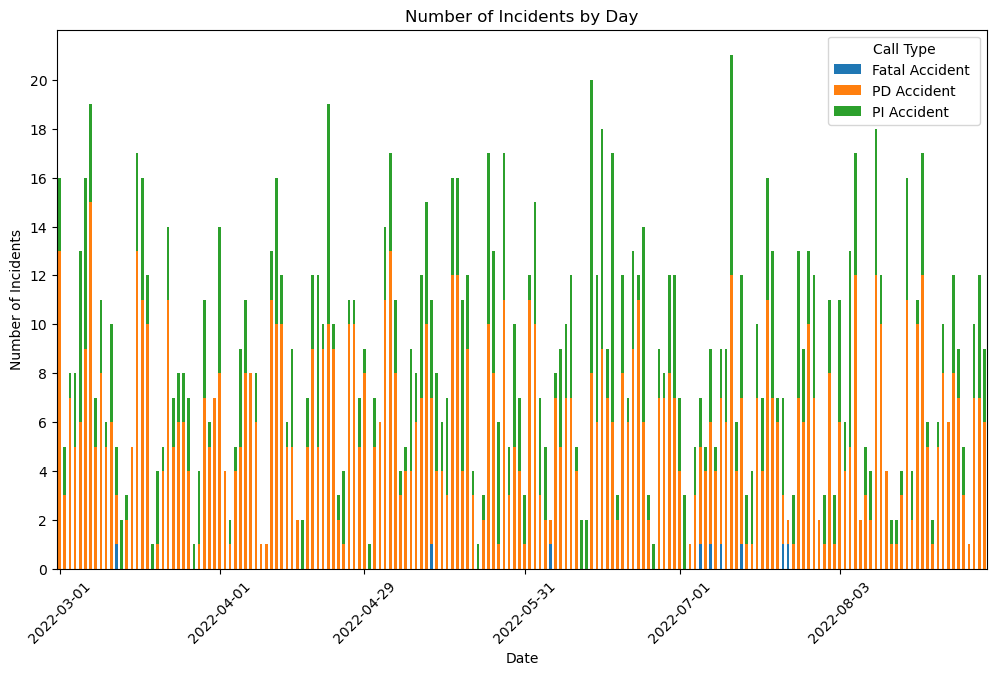

Call Type   Fatal Accident   PD Accident      PI Accident    
Date                                                         
2022-03-01              0.0             13.0              3.0
2022-03-02              0.0              3.0              2.0
2022-03-03              0.0              7.0              1.0
2022-03-04              0.0              5.0              3.0
2022-03-05              0.0              6.0              7.0
...                     ...              ...              ...
2022-08-27              0.0              3.0              2.0
2022-08-28              0.0              1.0              0.0
2022-08-29              0.0              7.0              3.0
2022-08-30              0.0              7.0              5.0
2022-08-31              0.0              6.0              3.0

[180 rows x 3 columns]


In [152]:
file_2018 = 'Phase III Combinder_CAD+TS (Mar-August 2018) - Modified RCT.xlsm'
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

file = file_2018
file = file_2022

df = pd.read_excel(file, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])

# Extract the date from the timestamp
df['Date'] = df['Timestamp'].dt.date
# Group the data by date and type and count the number of accidents
grouped_data = df.groupby(['Date', 'Call Type']).size().reset_index(name='Count')

# Create a pivot table to rearrange the data for plotting
pivot_table = grouped_data.pivot(index='Date', columns='Call Type', values='Count')
pivot_table = pivot_table.fillna(0)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the histogram
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Day')

# Set x-axis tick format to show only each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 21, step=2))
# Show the plot
plt.show()
print((pivot_table))


### Plot Incident Count Frequency Histogram 2022

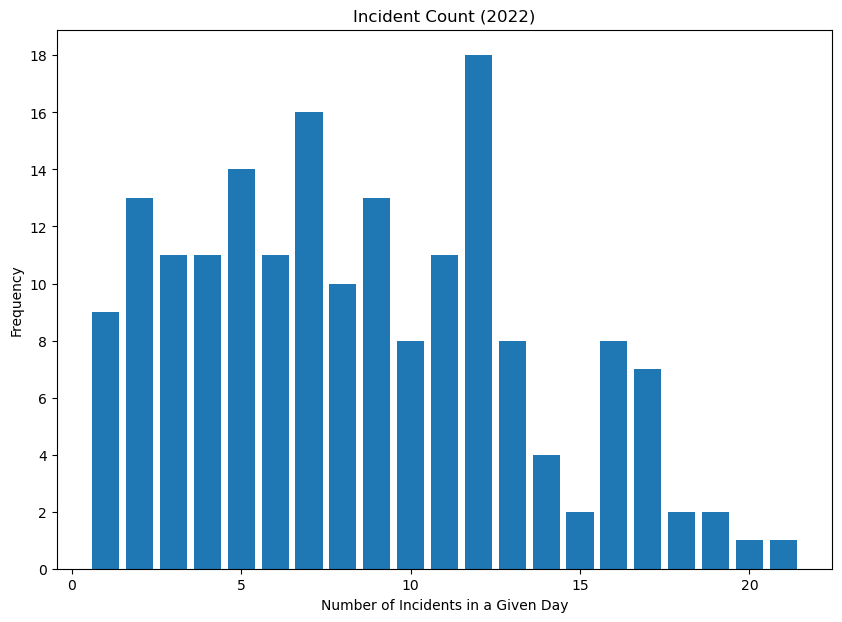

In [107]:
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

df = pd.read_excel(file_2022, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Group the dataframe by the date and call type, and count the number of accidents per group
grouped = df.groupby([df['Date'], 'Call Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate the total count of accidents per day
grouped['Total_Count'] = grouped.sum(axis=1)

# Reset the index of the grouped dataframe
grouped.reset_index(inplace=True)

# Group the dataframe by the total count and calculate the frequency
grouped2 = grouped.groupby('Total_Count').size()
# Plot the histogram
#grouped2.plot(kind='bar',width=0.8, label='Original Distribution')
plt.bar(grouped2.index, grouped2, label='Original Distribution')

plt.xlabel('Number of Incidents in a Given Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2022)')
plt.yticks(np.arange(0, 19, step=2))

plt.show()

### Plot Incident Count Frequency Histogram 2018

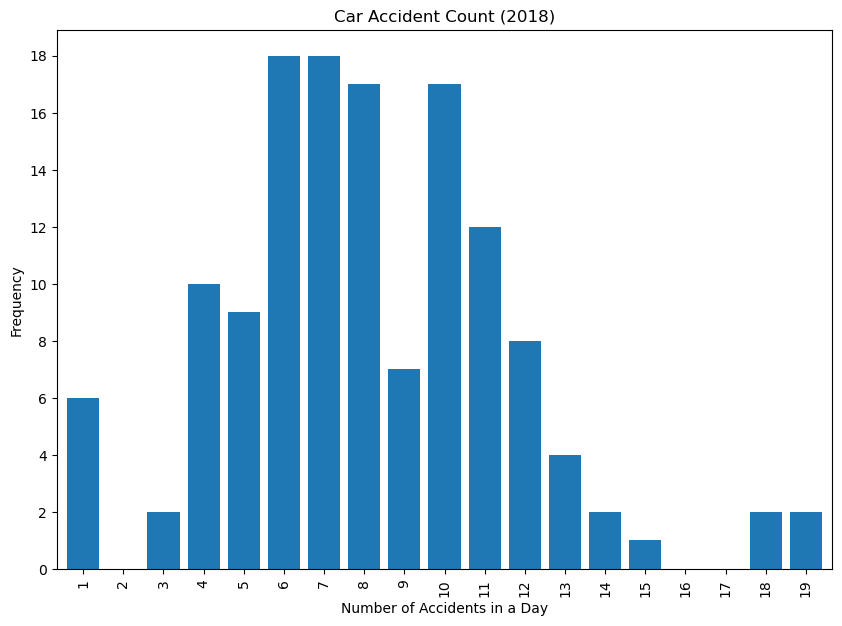

In [98]:
series_2018 = pd.Series([ 6, 0, 2, 10, 9, 18, 18, 17, 7, 17, 12, 8, 4, 2, 1, 0, 0, 2, 2])
fig, ax = plt.subplots(figsize=(10, 7))

series_2018.plot(kind='bar', width=0.8)
plt.xlabel('Number of Accidents in a Day')
plt.ylabel('Frequency')
plt.title('Car Accident Count (2018)')
plt.yticks(np.arange(0, 19, step=2))

plt.xticks(np.arange(0, 19, step=1), np.arange(1, 20, step=1))

plt.show()

In [100]:

class IncidentNumber:
    def __init__(self):
        num_selector = random.randint(1, 100)
        
        incident_ranges = [19, 36, 51, 64, 75, 84, 91, 96, 99, 100]
        incident_numbers = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
        
        for i in range(len(incident_ranges)):
            if num_selector <= incident_ranges[i]:
                self.inc_num = incident_numbers[i]
                break
    
    def get_inc_num(self):
        return self.inc_num

### Choose and Plot 10 Sample Daysa

Seed value: 8651171232264981345
10-Day Incident Count [13, 12, 14, 13, 4, 1, 7, 7, 5, 4]


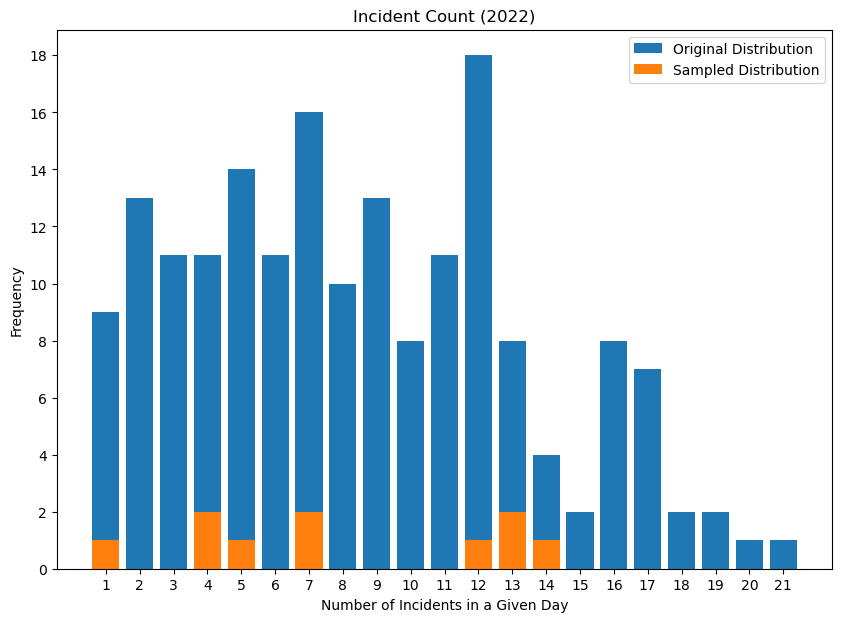

In [160]:
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

df = pd.read_excel(file_2022, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Group the dataframe by the date and call type, and count the number of accidents per group
grouped = df.groupby([df['Date'], 'Call Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate the total count of accidents per day
grouped['Total_Count'] = grouped.sum(axis=1)

# Reset the index of the grouped dataframe
grouped.reset_index(inplace=True)
# Group the dataframe by the total count and calculate the frequency
grouped2 = grouped.groupby('Total_Count').size()
# Plot the histogram
#grouped2.plot(kind='bar',width=0.8, label='Original Distribution')
plt.bar(grouped2.index, grouped2, label='Original Distribution')

##############


incident_numbers = grouped2.index
frequencies = [grouped2[i] for i in incident_numbers]

# Set the seed value
seed_value = random.randrange(sys.maxsize)
random.seed(seed_value)
print(f"Seed value: {seed_value}")


# Sample the distribution by randomly selecting ten days
sampled_days = random.choices(incident_numbers, weights=frequencies, k=10)

print(f"10-Day Incident Count {sampled_days}")

# Count the occurrences of each accident number in the sampled days
sampled_counts = [sampled_days.count(accident) for accident in incident_numbers]

# Plotting the bar chart
plt.bar(incident_numbers, sampled_counts, color='tab:orange', label='Sampled Distribution')

plt.xlabel('Number of Incidents in a Given Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2022)')
plt.yticks(np.arange(0, 19, step=2))
plt.xticks(np.arange(1, 22, step=1))

plt.legend()
plt.show()

### List of Seeds that look well-distributed
Seeds:  9137734339474138810
